In [44]:
library("igraph")
library(hash)
library(MASS)

options(scipen=999)

Warning message:
"package 'MASS' was built under R version 3.3.3"

In [2]:
# 8.3

In [3]:
weighted_movie_g = read_graph("project4_data/q6_movies_weighted.txt",format="ncol", directed = FALSE)

In [4]:
load(file = "q7_cluster_fast_greedy.rda")

In [5]:
movie_index = read.delim("project4_data/movie_index.txt", header=FALSE, sep='\t')

In [6]:
actor_index = read.delim("project4_data/actor_index.txt", header=FALSE, sep='\t')

In [7]:
actors_in_movie_index = read.delim("project4_data/actors_in_movies_list.txt", header=FALSE, sep='\t')

In [8]:
cur_best_size = 21
community = 0
for (i in 1:length(fg)){
    c_size = length(fg[[i]])
    if(c_size >= 10 && c_size <= 20 && c_size < cur_best_size){
        community = i
        cur_best_size = c_size
    }
}

In [88]:
community

[1] 27

In [87]:
cur_best_size

[1] 12

In [9]:
movie_nodes = c()
for(i in 1:cur_best_size){
    cur_movie_node = as.numeric(fg[community][[1]][i])
    movie_nodes = c(movie_nodes, cur_movie_node)
    print(movie_index[which(cur_movie_node == movie_index[,1]),2][1])
}

[1] Cent jours avant le lendemain (2015)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] 669: Escape the Reality (2011)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] An Olimatsim adventure (2011)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] L'affaire Hawkins (2014)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] La peur anonyme (2014)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] La Peur aux trousse (2015)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] Les oiseaux se cachaient pour mourir (2015)
183557 Levels: '11' (1980) '38 (1986) '42 (1951) '49-'17 (1917) ... Zwei blaue Vergissmeinnicht (1963)
[1] Midnight Stranger (2011)
18355

In [26]:
all_actors = c()
for(movie in movie_nodes){
    actors = actors_in_movie_index[which(movie == actors_in_movie_index[,1]),2]
    actors = toString(actors)
    actors = strsplit(actors, split = '   ')
    for(actor in actors[[1]]){
        if(!(actor %in% all_actors)){
            all_actors = c(all_actors, actor)
        }
    }
}
print(all_actors)

 [1] "Bourassa-Simpson, Mathieu"      "Desjardins, Nick"              
 [3] "Leonard, Joshua"                "Charlebois, Jessica"           
 [5] "Williams, Michael C."           "Legros, Simon (I)"             
 [7] "Donahue, Heather (I)"           "Lafond-Martel, Olivier"        
 [9] "Valin, Andréanne"               "Fortin, Samuel (I)"            
[11] "Riel-Dery, Jessica"             "Boucher-L'Écuyer, Émile Pascal"
[13] "Guimont, Mélanie"              


In [28]:
all_actor_ids = c()
movie_actor_el = c()
for(movie in movie_nodes){
    actors = actors_in_movie_index[which(movie == actors_in_movie_index[,1]),2]
    actors = toString(actors)
    actors = strsplit(actors, split = '   ')
    for(actor in actors[[1]]){
        actor_id = actor_index[which(actor == actor_index[,2]),1]
        all_actor_ids = c(all_actor_ids, actor_id)
        movie_actor_el = c(movie_actor_el, movie)
        movie_actor_el = c(movie_actor_el, actor_id)
    }
}

In [62]:
unique_actor_ids = unique(all_actor_ids)

In [35]:
count = 1
el_matrix = matrix(, nrow = length(movie_actor_el)/2, ncol = 2)
for(i in 1:(length(movie_actor_el)/2)){
    el_matrix[i,1] = movie_actor_el[count]
    el_matrix[i,2] = movie_actor_el[count+1]
    count = count + 2
}

In [50]:
write.matrix(el_matrix, file="project4_data/bipartite_data.txt", sep = " ")

In [52]:
bipartite_g = read_graph("project4_data/bipartite_data.txt",format="ncol", directed = FALSE)

In [60]:
for(movie in movie_nodes){
    V(bipartite_g)[toString(movie)]$color = 'lightblue'
}

In [64]:
for(actor in unique_actor_ids){
    V(bipartite_g)[toString(actor)]$color = 'lightpink'
}

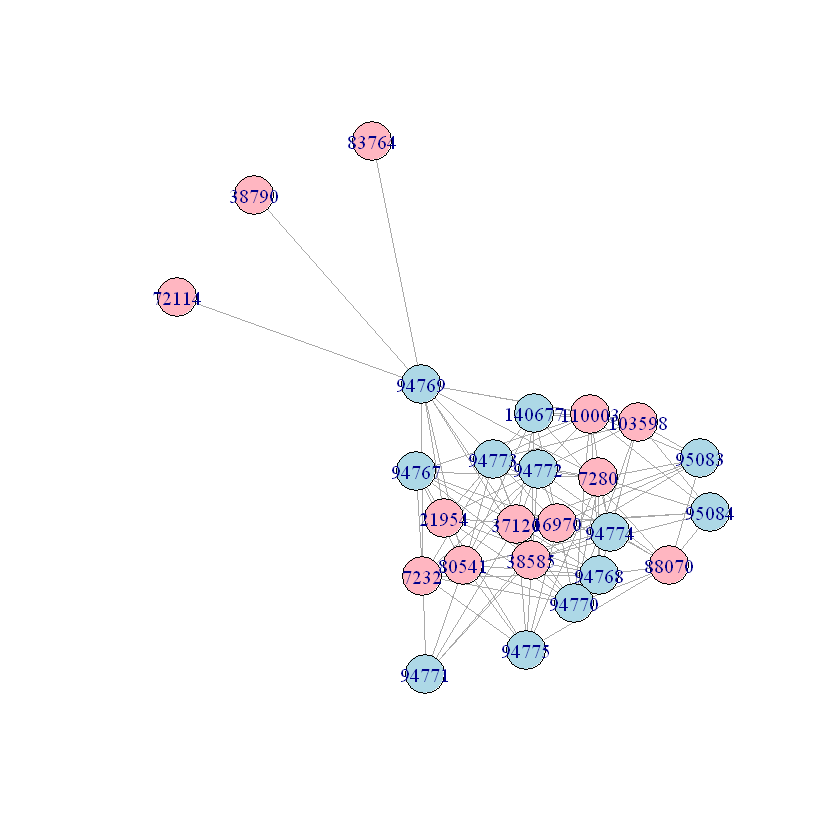

In [65]:
plot(bipartite_g)

In [76]:
three_most_important_actors = sort(table(all_actor_ids),decreasing=TRUE)[1:3]

In [77]:
print(three_most_important_actors)

all_actor_ids
16970 37120 38585 
   12    12    12 


In [86]:
for(i in 1:length(three_most_important_actors)){
    actor_id = names(three_most_important_actors)[i]
    num_movies_in = three_most_important_actors[i]
    actor = actor_index[which(actor_id == actor_index[,1]),2]
    print(paste("Actor: ", actor))
    print(paste("Number of movies in: ", num_movies_in))
}

[1] "Actor:  Desjardins, Nick"
[1] "Number of movies in:  12"
[1] "Actor:  Lafond-Martel, Olivier"
[1] "Number of movies in:  12"
[1] "Actor:  Legros, Simon (I)"
[1] "Number of movies in:  12"
